In [1]:
import os 
os.chdir("../..")
import numpy
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scripts.python.PdfParse import *
from scripts.python.ts_utils import *
from scripts.python.utils import *

In [2]:
samoa_folder = os.getcwd() + "/data/tourism/samoa/"
filepath = os.getcwd() + "/data/tourism/samoa/" + os.listdir(samoa_folder)[-1]

## Samoa Census

In [3]:
samoa_raw = pd.read_excel(filepath)
samoa_raw.head(5)

,"Table 1. TOURISM EARNINGS, AVERAGE EXPENDITURE AND TOURISM PRICE INDEX",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2002-08-08 00:00:00,2002-09-08 00:00:00,2002-10-08 00:00:00,2002-11-08 00:00:00,2002-12-08 00:00:00,2003-01-08 00:00:00,2003-02-08 00:00:00,2003-03-08 00:00:00,2003-04-08 00:00:00,...,2022-02-08 00:00:00,2022-03-08 00:00:00,2022-04-08 00:00:00,2022-05-08 00:00:00,2022-06-08 00:00:00,2022-07-08 00:00:00,2022-08-08 00:00:00,2022-09-08 00:00:00,NaN,NaN
2,Total arrivals (persons),8260,6708,5737,6653,13042,7555,5968,5550,7283,...,0,0,0,0,0,0,6228,8130,NaN,NaN
3,"Arrivals, by market (persons)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,American Samoa,2877,2119,1892,2530,4678,2531,1993,1858,2319,...,0,0,0,0,0,0,692,697,NaN,NaN


In [4]:
samon_byco = samoa_raw.iloc[:11, ]

# change the column name
colname = samon_byco.iloc[1].to_list()
colname[0] = "Country"
samon_byco.columns = colname

# drop irrelevant rows
samon_byco = (samon_byco.drop(index=[0, 1, 3])
              .reset_index()
              .drop("index", axis=1))

# reshape the data and change the colname again
samon_byco = samon_byco.T.reset_index()
colname_t = samon_byco.iloc[0].to_list()
colname_t[0] = "Date"
samon_byco.columns = colname_t

# reset the index
samon_byco = (samon_byco.drop(index=0)
              .dropna()
              .reset_index()
              .drop("index", axis=1))

In [5]:
# change the column format
samon_byco["Date"] = pd.to_datetime(samon_byco["Date"])
samon_byco["Year"], samon_byco["Month"] = samon_byco["Date"].dt.year, \
            samon_byco["Date"].dt.month


for col in samon_byco.columns:
    if col != "Date":
        samon_byco[col] = samon_byco[col].astype(float)

samon_byco.to_csv(samoa_folder + "samoa_byCon.csv", encoding="utf-8")
samon_byco.head(5)

,Date,Total arrivals (persons),American Samoa,Australia,Europe,New Zealand,USA,Other Countries,Cruise ships,Year,Month
0,2002-08-08,8260.0,2877.0,1115.0,429.0,2035.0,933.0,871.0,0.0,2002.0,8.0
1,2002-09-08,6708.0,2119.0,972.0,372.0,1879.0,612.0,754.0,0.0,2002.0,9.0
2,2002-10-08,5737.0,1892.0,737.0,468.0,1492.0,577.0,571.0,0.0,2002.0,10.0
3,2002-11-08,6653.0,2530.0,864.0,393.0,1675.0,483.0,708.0,0.0,2002.0,11.0
4,2002-12-08,13042.0,4678.0,1918.0,272.0,4401.0,1007.0,766.0,0.0,2002.0,12.0


In [9]:
samon_byco

,Date,Total arrivals (persons),American Samoa,Australia,Europe,New Zealand,USA,Other Countries,Cruise ships,Year,Month
0,2002-08-08,8260.0,2877.0,1115.0,429.0,2035.0,933.0,871.0,0.0,2002.0,8.0
1,2002-09-08,6708.0,2119.0,972.0,372.0,1879.0,612.0,754.0,0.0,2002.0,9.0
2,2002-10-08,5737.0,1892.0,737.0,468.0,1492.0,577.0,571.0,0.0,2002.0,10.0
3,2002-11-08,6653.0,2530.0,864.0,393.0,1675.0,483.0,708.0,0.0,2002.0,11.0
4,2002-12-08,13042.0,4678.0,1918.0,272.0,4401.0,1007.0,766.0,0.0,2002.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
237,2022-05-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,5.0
238,2022-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,6.0
239,2022-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,7.0
240,2022-08-08,6228.0,692.0,1657.0,126.0,2641.0,382.0,730.0,0.0,2022.0,8.0


In [10]:
get_adf_df(samon_byco.iloc[5:], ["Total arrivals (persons)"])

,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
Total arrivals (persons),-3.408495,0.010673,14.0,222.0,-3.460154,-2.874649,-2.573757


In [11]:
# Perform the basic quality check
error_lst = check_quality(samon_byco, ["Date", "Cruise ships", "Year", "Month"], "Total arrivals (persons)")
samon_byco.iloc[error_lst]

,Date,Total arrivals (persons),American Samoa,Australia,Europe,New Zealand,USA,Other Countries,Cruise ships,Year,Month
41,2006-01-08,8025.0,1742.0,1517.0,315.0,3104.0,579.0,768.0,825.0,2006.0,1.0
50,2006-10-08,8515.0,1765.0,1827.0,430.0,3111.0,582.0,800.0,434.0,2006.0,10.0
54,2007-02-08,7201.0,1737.0,1179.0,378.0,2448.0,579.0,880.0,1614.0,2007.0,2.0
57,2007-05-08,9166.0,1878.0,1591.0,343.0,3802.0,746.0,806.0,1614.0,2007.0,5.0
65,2008-01-08,8940.0,1324.0,1870.0,348.0,3915.0,648.0,835.0,1932.0,2008.0,1.0
66,2008-02-08,6932.0,1317.0,1270.0,387.0,2274.0,852.0,832.0,3859.0,2008.0,2.0
67,2008-03-08,8165.0,1943.0,1283.0,403.0,3017.0,777.0,742.0,153.0,2008.0,3.0
68,2008-04-08,8792.0,1815.0,1476.0,417.0,3530.0,554.0,1000.0,365.0,2008.0,4.0
70,2008-06-08,10733.0,2762.0,1712.0,385.0,4488.0,683.0,703.0,2398.0,2008.0,6.0
71,2008-07-08,12935.0,2553.0,1956.0,540.0,5352.0,975.0,1559.0,2820.0,2008.0,7.0


## Aviation data

In [12]:
aviation_path = os.getcwd() + "/data/tourism/aviation_seats_flights_pic.xlsx"
aviation = pd.read_excel(aviation_path)
aviation.head(5)

,Country,ISO,Region,Date,Aircraft_type,Seats_arrivals_domestic,Seats_arrivals_interregional,Seats_arrivals_intraregional,Seats_arrivals_intl,Seats_arrivals_total,Available_seat_kilometers,Number_of_flights_domestic,Number_of_flights_interregional,Number_of_flights_intraregional,Number_of_flights_intl,Number_of_flights_total
0,Fiji,FJ,East Asia & Pacific,2019-01-01,passenger,839,273,3480,3753,4592,1.430416e+07,8,1,10,11,19
1,Fiji,FJ,East Asia & Pacific,2019-01-02,passenger,974,313,3471,3784,4758,1.495610e+07,8,1,10,11,19
2,Fiji,FJ,East Asia & Pacific,2019-01-03,passenger,1190,443,3675,4118,5308,1.592143e+07,10,2,12,14,24
3,Fiji,FJ,East Asia & Pacific,2019-01-04,passenger,831,586,3159,3745,4576,1.457334e+07,7,2,12,14,21
4,Fiji,FJ,East Asia & Pacific,2019-01-05,passenger,744,273,4752,5025,5769,1.773449e+07,7,1,12,13,20


In [14]:
ws_avi = (aviation[(aviation.ISO == "WS") & (aviation.Aircraft_type == "passenger")]
          .reset_index()
          .drop("index", axis=1)
          [["Date", "Number_of_flights_intl", "Number_of_flights_total",
            "Seats_arrivals_intl", "Seats_arrivals_total"]])

dates = pd.DataFrame(pd.date_range(start="2019-01-01",
                                   end="2022-09-30"), columns=["Date"])

ws_avi = dates.merge(ws_avi, how="left", on="Date")
ws_avi["Date"] = pd.to_datetime(ws_avi["Date"])
ws_avi["Month"], ws_avi["Year"] = ws_avi["Date"].dt.month, ws_avi["Date"].dt.year

ws_avi_19_22 = ws_avi.groupby(by=["Year", "Month"]).sum().reset_index()

In [15]:
ws_avi_merged = ws_avi_19_22.merge(samon_byco, on=["Year", "Month"], how="left").drop("Date", axis=1)
ws_avi_merged.head(5)

,Year,Month,Number_of_flights_intl,Number_of_flights_total,Seats_arrivals_intl,Seats_arrivals_total,Total arrivals (persons),American Samoa,Australia,Europe,New Zealand,USA,Other Countries,Cruise ships
0,2019,1,90.0,93.0,26332.0,26389.0,13755.0,1116.0,3434.0,612.0,6290.0,862.0,1441.0,500.0
1,2019,2,71.0,84.0,17320.0,17681.0,9044.0,968.0,1820.0,458.0,3645.0,594.0,1559.0,2180.0
2,2019,3,85.0,109.0,20843.0,21546.0,11163.0,1089.0,2481.0,716.0,4400.0,981.0,1496.0,6730.0
3,2019,4,84.0,117.0,20801.0,21751.0,14413.0,1204.0,3122.0,658.0,6887.0,827.0,1715.0,2519.0
4,2019,5,85.0,115.0,20843.0,21679.0,13565.0,1215.0,3143.0,492.0,5742.0,962.0,2011.0,0.0


In [16]:
ws_avi_merged[["Seats_arrivals_total", "Seats_arrivals_intl", "Total arrivals (persons)"]].describe()

,Seats_arrivals_total,Seats_arrivals_intl,Total arrivals (persons)
count,45.000000,45.000000,45.000000
mean,8907.377778,8689.933333,4819.755556
std,9915.578547,9696.295413,6967.989045
min,378.000000,378.000000,0.000000
25%,1576.000000,1500.000000,0.000000
50%,2445.000000,2317.000000,0.000000
75%,20334.000000,20049.000000,10456.000000
max,30302.000000,29238.000000,24647.000000


## EDA
### Ratio

'/Users/czhang'

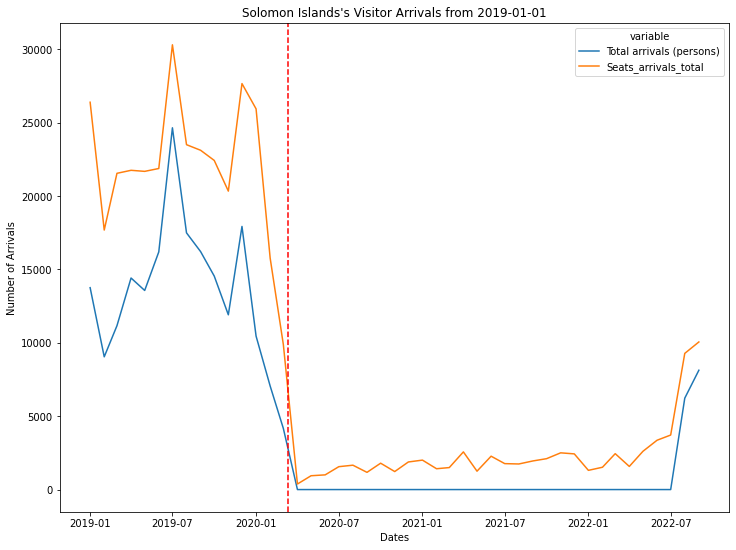

In [42]:
import seaborn as sns

viz_df = ws_avi_merged[["Year", "Month", "Total arrivals (persons)", "Seats_arrivals_total"]]
viz_df = pd.melt(viz_df, ["Year", "Month"])
viz_df["value"] = viz_df["value"].astype(float)
viz_df["dates"] = [pd.to_datetime(str(year) + "-" + str(month) + "-01" )
                   for year, month in zip(viz_df["Year"], viz_df["Month"])]

plt.figure(figsize=(12, 9))
# sns.set_style("whitegrid")
sns.lineplot(data=viz_df, x="dates", y="value", hue="variable")
plt.xlabel("Dates")
plt.axvline(datetime.datetime(2020, 3, 12), linestyle="dashed", color="red")
plt.ylabel("Number of Arrivals")
plt.title("Solomon Islands's Visitor Arrivals from 2019-01-01")
# plt.xticks(rotation=45)
plt.savefig("sb.png", dpi=400)

In [17]:
cols = ["Seats_arrivals_total", "Seats_arrivals_intl", "Number_of_flights_intl", "Number_of_flights_total", "Total arrivals (persons)"]

ws_avi_merged["total_ratio"] = (ws_avi_merged["Total arrivals (persons)"] + 1) / \
    ws_avi_merged["Seats_arrivals_total"]

### Correlation
#### Pearson

In [18]:
from scipy.stats import pearsonr


corr_seats, _ = pearsonr(
    ws_avi_merged["Seats_arrivals_total"], ws_avi_merged["Total arrivals (persons)"])
corr_seats_intl, _ = pearsonr(
    ws_avi_merged["Seats_arrivals_intl"],  ws_avi_merged["Total arrivals (persons)"])
print(
    f"Pearson Correlation between FlightRadar's Seats Arrival and WS's census data is{corr_seats: .4f}." 
    f"\nPearson Correlation between FlightRadar's # of Seats Arrival Intl and WS's census data is{corr_seats_intl: .4f}.")


corr_matrix = ws_avi_merged[cols].corr()
corr_matrix

Pearson Correlation between FlightRadar's Seats Arrival and WS's census data is 0.9528.
Pearson Correlation between FlightRadar's # of Seats Arrival Intl and WS's census data is 0.9503.


,Seats_arrivals_total,Seats_arrivals_intl,Number_of_flights_intl,Number_of_flights_total,Total arrivals (persons)
Seats_arrivals_total,1.000000,0.999837,0.987905,0.983594,0.952782
Seats_arrivals_intl,0.999837,1.000000,0.987597,0.981157,0.950264
Number_of_flights_intl,0.987905,0.987597,1.000000,0.992128,0.942759
Number_of_flights_total,0.983594,0.981157,0.992128,1.000000,0.957409
Total arrivals (persons),0.952782,0.950264,0.942759,0.957409,1.000000


#### Cross-correlation

In [20]:
incl_cols = ["Total arrivals (persons)", "Seats_arrivals_intl"]
ws_cc = cross_corr_df(ws_avi_merged, "Seats_arrivals_intl", "Total arrivals (persons)")
ws_cc.head(5)

,lag,cross_corr_coef
0,0,0.950264
1,1,0.887686
2,2,0.848828
3,3,0.786986
4,4,0.695619


### ADF test

In [21]:
get_adf_df(ws_avi_merged, incl_cols)

,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
Total arrivals (persons),-2.306947,0.169737,10.0,34.0,-3.639224,-2.951230,-2.614447
Seats_arrivals_intl,-1.703234,0.429447,7.0,37.0,-3.620918,-2.943539,-2.610400


In [26]:
ws_diff = ws_avi_merged.diff().dropna()
ws_diff2 = ws_diff.diff().dropna()
get_adf_df(ws_diff2, incl_cols)

,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
Total arrivals (persons),-5.955568,2.097277e-07,4.0,38.0,-3.615509,-2.941262,-2.609200
Seats_arrivals_intl,-2.271449,1.813417e-01,10.0,32.0,-3.653520,-2.957219,-2.617588


### Granger's Causality Test

In [20]:
grangers_causation_matrix(ws_diff,incl_cols, maxlag=10)

,Total arrivals (persons)_x,Seats_arrivals_intl_x
Total arrivals (persons)_y,1.0,0.0
Seats_arrivals_intl_y,0.0,1.0
